<h2>Assignment 1 - Part 1: Linear Regression on Boston Housing Data</h2>

You're asked to do the following tasks to predict boston house price:
<lu>
<li>Use scikit-learn</li>
<li>Implement analytical solution (normal equation) to obtain weights</li>
<li>Implement numerical solution (gradient descent) to obtain weights</li>
</lu>
    Note: the accuracy of your implementations should be close to that of a linear model from scikit-learn

In addition, you need to show the resulting intercept and coefficents, calculate errors on training dataset and testing dataset, and plot a figure to show your predictions and real prices on the testing dataset. 

In [0]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [0]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

<h4>Use scikit-learn library in the following cell</h4>

intercept: [30.24675099]
coefficients: [[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]
Mean squared error(MSE) for testing dataset: 12.1456
Mean squared error(MSE) for training dataset: 10.8207


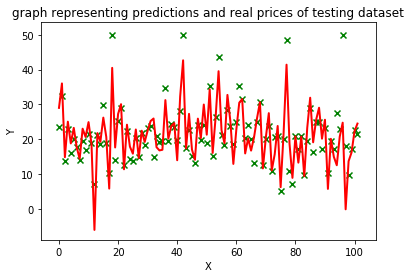

In [11]:
# Task 1-1: use linear regression in sklearn

# creating linear regression object
regression = linear_model.LinearRegression();

# training the model using training datasets
regression.fit(train_data, train_target)

# Task 1-2: show intercept and coefficents
#intercept
print('intercept:' ,regression.intercept_)

#coefficients
print('coefficients:', regression.coef_)

# Task 1-3: show errors on training dataset and testing dataset
#printing errors: MSE= 1/2N((target-prediction)^2)

p=regression.predict(test_data)
q=regression.predict(train_data)

#for testing dataset
print("Mean squared error(MSE) for testing dataset: %.4f" %(np.mean((test_target-p)**2)/2))

#for training dataset
print("Mean squared error(MSE) for training dataset: %.4f" %(np.mean((train_target-q)**2)/2))

# Task 1-4: show plot a figure to show your predictions and real prices on the testing dataset
plt.title('graph representing predictions and real prices of testing dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(np.arange(test_data.shape[0]),p,color='red',linewidth=2)
plt.scatter(np.arange(test_data.shape[0]),test_target,color='green',marker='x')
plt.show()



<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

end weights: [[ 3.02467510e+01]
 [-1.13055924e-01]
 [ 3.01104641e-02]
 [ 4.03807204e-02]
 [ 2.78443820e+00]
 [-1.72026334e+01]
 [ 4.43883520e+00]
 [-6.29636221e-03]
 [-1.44786537e+00]
 [ 2.62429736e-01]
 [-1.06467863e-02]
 [-9.15456240e-01]
 [ 1.23513347e-02]
 [-5.08571424e-01]]
intercept [30.24675099]
coefficients [[-1.13055924e-01]
 [ 3.01104641e-02]
 [ 4.03807204e-02]
 [ 2.78443820e+00]
 [-1.72026334e+01]
 [ 4.43883520e+00]
 [-6.29636221e-03]
 [-1.44786537e+00]
 [ 2.62429736e-01]
 [-1.06467863e-02]
 [-9.15456240e-01]
 [ 1.23513347e-02]
 [-5.08571424e-01]]
Mean squared error(MSE) for testing dataset: 12.1456
Mean squared error(MSE) for training dataset: 10.8207


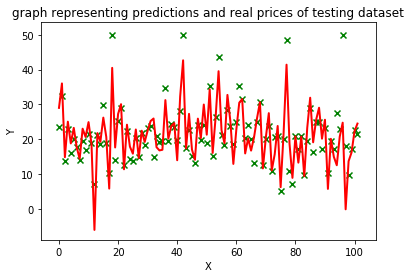

In [10]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights

 
def myNormalEqualFun(X,y):
  XTrans=X.T                                #X^T
  dotProd= np.dot(XTrans,X)                 #X^T.X
  inversemat= np.linalg.inv(dotProd)        #(X^T.X)^-1
  dotProd2=np.dot(inversemat,XTrans)        #((X^T.X)^-1).X^T
  Weights=np.dot(dotProd2,y)                #W=((X^T.X)^-1).X^T.y
  
  #print("Weights:",Weights)
  
  return Weights
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions

#predictions=X.w
def myPredictFun(X,w):
  predictions=np.dot(X,w)          #predictions= X.w
  return predictions

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)
print("end weights:",w)


# Task 2-3: show intercept and coefficents
print("intercept" ,w[0])    
print("coefficients", w[1:14])

# Task 2-4: show errors on training dataset and testing dataset

#printing errors: MSE= 1/2N((target-prediction)^2)

p=myPredictFun(test_data_intercept,w)
q=myPredictFun(train_data_intercept,w)

#for testing dataset
print("Mean squared error(MSE) for testing dataset: %.4f" %(np.mean((test_target-p)**2)/2))   #p is prediction for test_data

#for training dataset
print("Mean squared error(MSE) for training dataset: %.4f" %(np.mean((train_target-q)**2)/2)) #q is prediction for train_data



# Task 2-5: show plot a figure to show your predictions and real prices on the testing dataset
plt.title('graph representing predictions and real prices of testing dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(np.arange(test_data.shape[0]),p,color='red',linewidth=2)                             #p is prediction for test_data
plt.scatter(np.arange(test_data.shape[0]),test_target,color='green',marker='x')
plt.show()

<h4>Use numerical solution (gradient descent) to perform linear regression in the following cell</h4>

initial weight: [[0.501641  ]
 [0.92908638]
 [0.99763326]
 [0.71574223]
 [0.48318668]
 [0.36057273]
 [0.50482105]
 [0.81909811]
 [0.20239607]
 [0.04579143]
 [0.05474709]
 [0.36461789]
 [0.56366102]
 [0.69302928]]
end Weights: [[ 1.90447704e+40]
 [ 1.14437244e+57]
 [-1.20806719e+57]
 [ 1.62921185e+57]
 [ 8.19466968e+55]
 [ 1.60512102e+57]
 [-8.60643418e+56]
 [ 1.44746523e+57]
 [-1.51841526e+57]
 [ 1.48911951e+57]
 [ 1.56537639e+57]
 [ 9.28833539e+56]
 [-9.39203111e+56]
 [ 1.43006432e+57]]
coefficients [[ 1.14437244e+57]
 [-1.20806719e+57]
 [ 1.62921185e+57]
 [ 8.19466968e+55]
 [ 1.60512102e+57]
 [-8.60643418e+56]
 [ 1.44746523e+57]
 [-1.51841526e+57]
 [ 1.48911951e+57]
 [ 1.56537639e+57]
 [ 9.28833539e+56]
 [-9.39203111e+56]
 [ 1.43006432e+57]]
intercept [1.90447704e+40]
Mean squared error(MSE) for testing dataset: 12.1456
Mean squared error(MSE) for training dataset: 10.8207


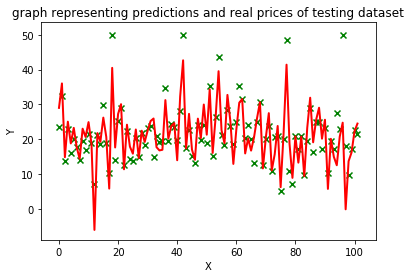

In [71]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


#print("X", train_data_intercept)
#print("y",train_target)



# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: Weights
def myGradientDescentFun(X,y,learning_rate,numItrs):
    #n= len(X)
    #print("n:",n)
    weight = np.random.rand(X[0].size,1)                    #randomly generated weights
    print("initial weight:",weight)                         # or can take static values for weights like weight= [[0.302],[0.681],[0.261],[0.987],[0.213],[0.439],[0.177],[0.897],[0.385],[0.974 ],[0.952],[0.441],[0.064],[0.258 ]]
   
    for no_of_iteration in range(numItrs):                  #loop till number of iterations
      dotprod= np.dot(X,weight)                             #X.w
      lossfunc = y - dotprod                                #t-X.w= l
      XTrans= X.T                                           #X^T
      Gradient=(np.dot(XTrans,lossfunc))/len(X)             #gradient=(X^T.(t-X.w))/N
      weight = weight - (learning_rate * Gradient)          #w=w-lr*gradient
      #print("w in loop:",weight)
    return weight
  

  
# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
  predictions=np.dot(X,w)                    #prediction=X.w
  return predictions

#predictions
p=myPredictFun(test_data_intercept,w)
q=myPredictFun(train_data_intercept,w)

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w = myGradientDescentFun(train_data_intercept,train_target,0.05,500)
print("end Weights:",w)


# Task 3-3: show intercept and coefficents
#printing coefficients
print("coefficients", w[1:14]) 

#printing intercept
print("intercept" ,w[0])      


# Task 3-4: show errors on training dataset and testing dataset

#printing errors: MSE= 1/2N((target-prediction)^2)
#for testing dataset
print("Mean squared error(MSE) for testing dataset: %.4f" %(np.mean((test_target-p)**2)/2))   #p is prediction for test_data

#for training dataset
print("Mean squared error(MSE) for training dataset: %.4f" %(np.mean((train_target-q)**2)/2)) #q is prediction for train_data



# Task 3-5: show plot a figure to show your predictions and real prices on the testing dataset
plt.title('graph representing predictions and real prices of testing dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(np.arange(test_data.shape[0]),p,color='red',linewidth=2)                         #p is prediction for test_data
plt.scatter(np.arange(test_data.shape[0]),test_target,color='green',marker='x')
plt.show()